In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

cot_path = f"./gpt-3.5-turbo-0301_below_average.csv"

cot_df = pd.read_csv(cot_path)

cot_df = cot_df.drop_duplicates()
cot_df = cot_df.drop(columns=["checkpoint", "batch_size", "loading_precision", "seed", "sample", "scoring_method", "prompting_method", "mask_strategy", "mask_accuracy"])
cot_df.to_csv("llm.csv")

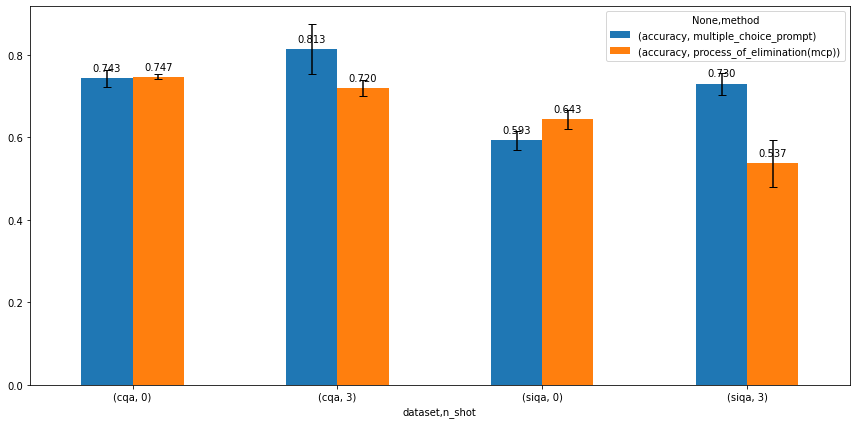

In [2]:
datasets = ["cqa", "siqa"]
vis_df = cot_df[cot_df["dataset"].isin(datasets)]

fig, ax = plt.subplots(figsize=(12, 6))

vis_df = vis_df.groupby(['dataset', 'n_shot', 'method'])
vis_mean = vis_df.mean().unstack()
vis_std = vis_df.std().unstack()
vis_mean.plot.bar(yerr=vis_std, ax=ax, capsize=4, rot=0)
# plot numbers on each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.savefig("llm.png", dpi=300, bbox_inches='tight')
